In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import contextily as cx
import numpy
import matplotlib as mpl


In [2]:
# colors = ['red', 'orange', 'yellow', 'green', 'blue', 'cyan', 'purple']
mcolors = mpl.colors.CSS4_COLORS
colors = []
for key in mcolors.keys():
    colors.append(mcolors[key])

## Common coordinate systems

- "EPSG:4326": WGS84 Latitude/Longitude, used in GPS
- "EPSG:3395": Spherical Mercator. Google Maps, OpenStreetMap, Bing Maps
- "EPSG:32633": UTM Zones (North) – (Universal Transverse Mercator)
- "EPSG:32733": UTM Zones (South) – (Universal Transverse Mercator)

In [3]:
df = pandas.read_excel('/Users/todd/GitHub/ecohydrology/Distribution/Info/USACE_Offices_and_locations.xlsx')
offices = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

# Set to WGS84. The coordinates in the file above were created in Google Earth.
offices = offices.set_crs('EPSG:4326')

In [4]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
states = geopandas.read_file('/Users/todd/GitHub/ecohydrology/Distribution/Info/states_21basic/states.shp')
states = states.to_crs('EPSG:4326')
# North_America = world[world.continent == 'North America']

In [5]:
im = OffsetImage(plt.imread('/Users/todd/GitHub/ecohydrology/Distribution/Info/Corps_Castle.png', format="png"), zoom=.06)

(25.0, 50.0)

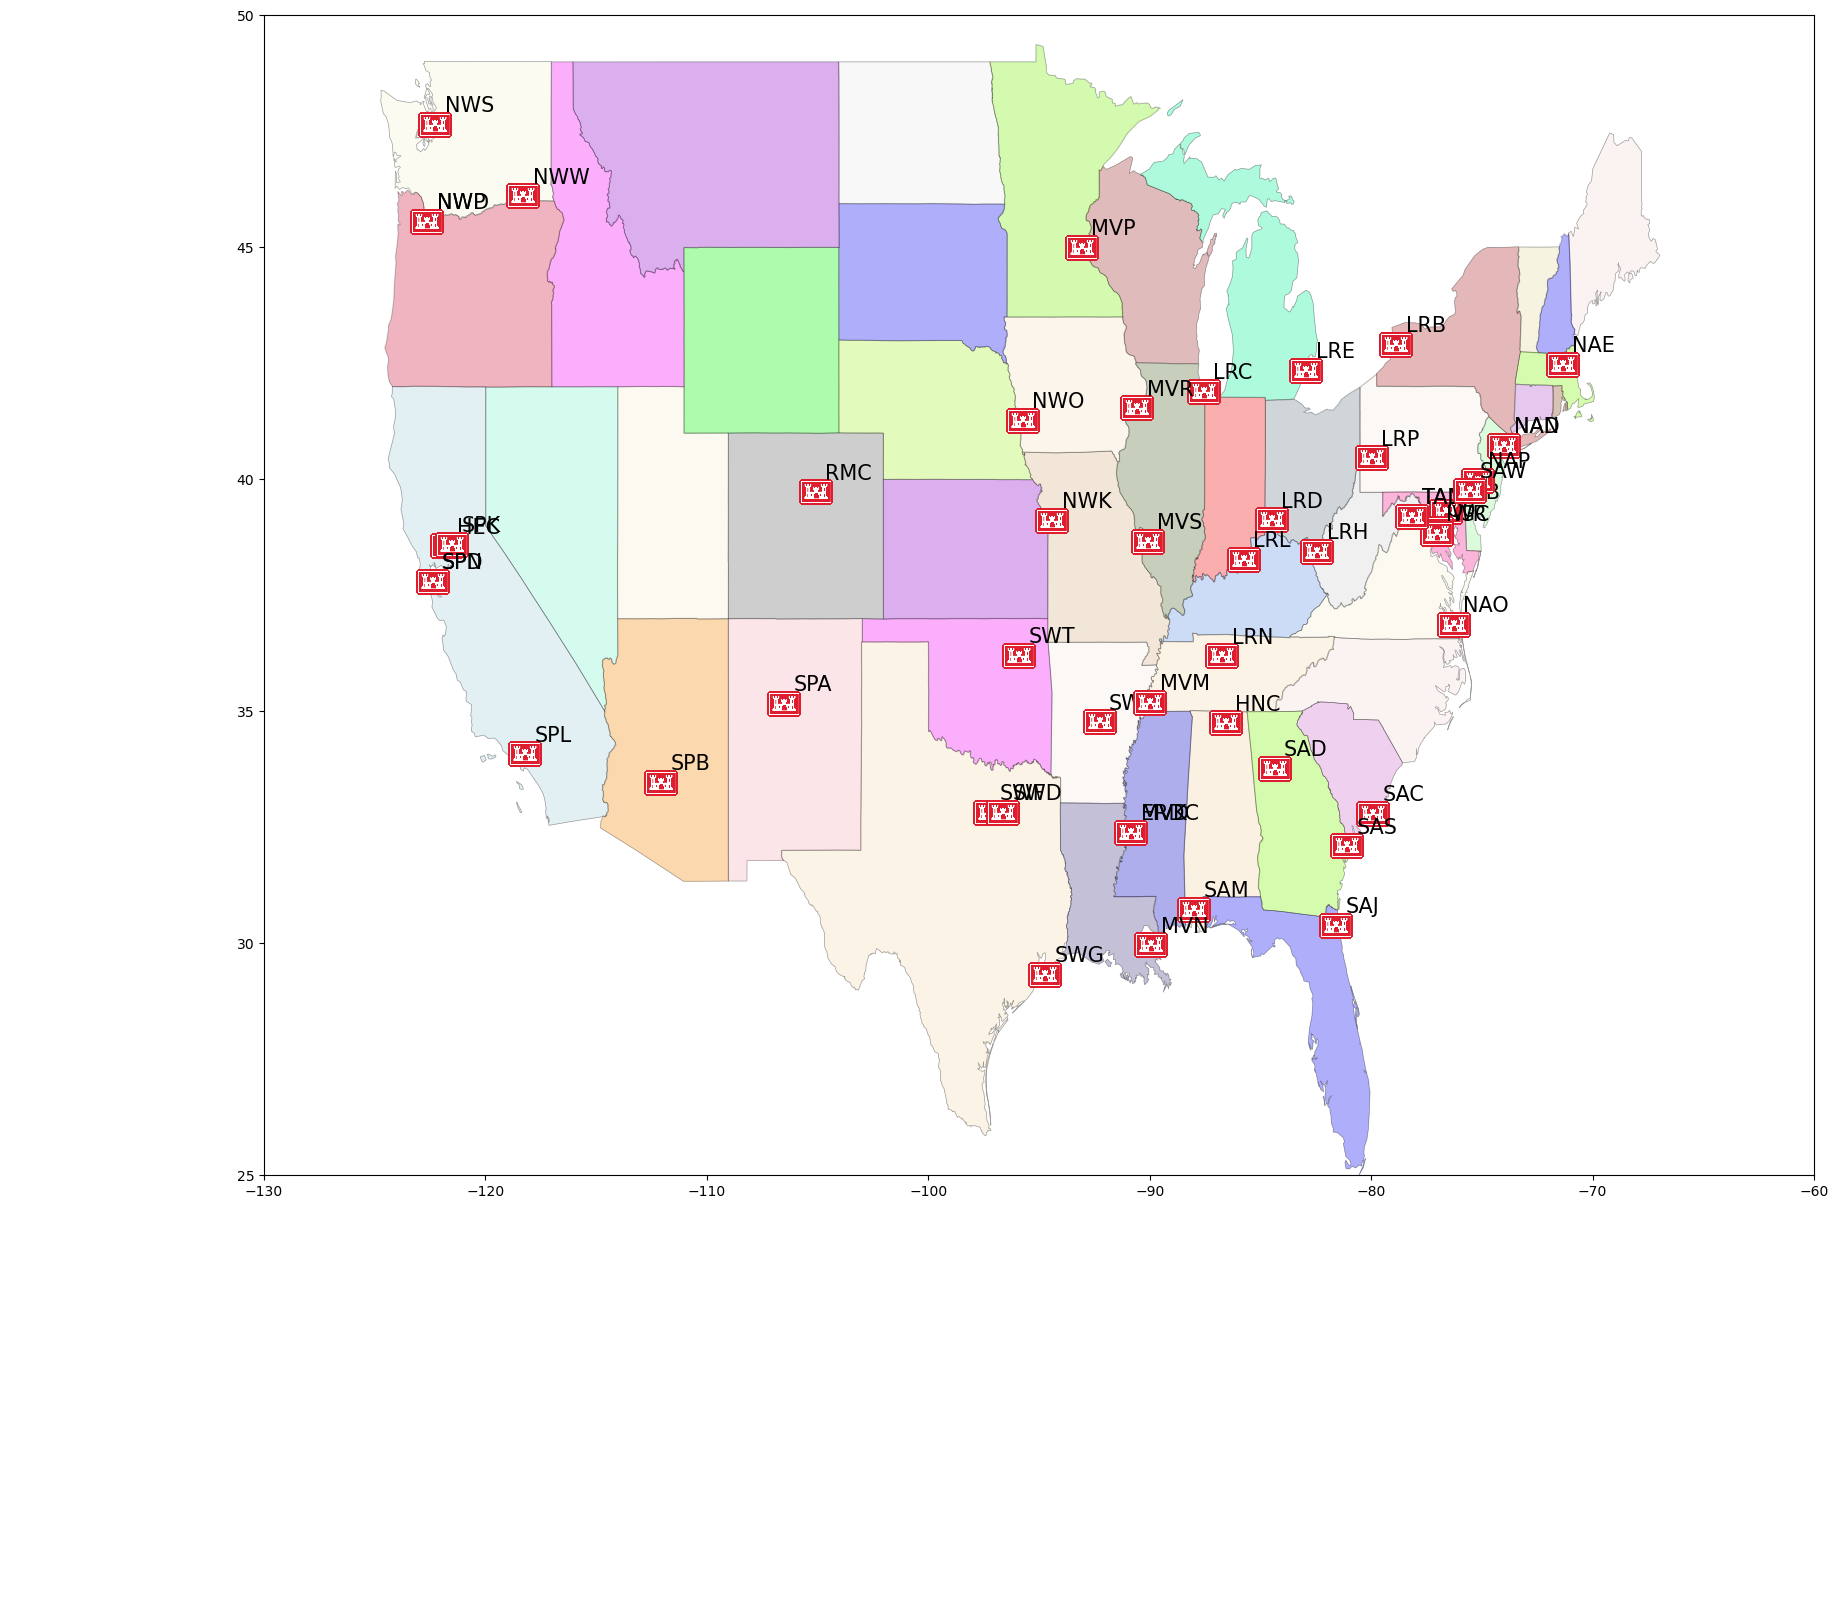

In [6]:
# locations_to_plot = ['RMC', 'SPA', 'SWT', 'NWK', 'NWO', 'SWF', 'MVP']
locations_to_plot = offices.Identifier.values

# fig, ax1 = plt.subplots(1, 1)
# fig.set_size_inches([20,20])
ax1 = offices.plot(figsize=(20,20), marker='o', color='red', markersize=20, alpha=0.5)

# cx.add_basemap(ax1, crs=offices.crs)
# cx.add_basemap(ax1, source=cx.providers.Stamen.Watercolor, zoom=12)
# cx.add_basemap(ax1, source=cx.providers.Stamen.TonerLabels, zoom=10)

# world.boundary.plot(ax=ax1, alpha=0.5)

states.plot(ax=ax1, color='lightgray', linewidth=0.5, edgecolor='black', alpha=0.1)
for state_name in states.STATE_NAME.values:
    color = numpy.random.choice(colors)
    state = states.loc[states['STATE_NAME'] == state_name]
    state.plot(ax=ax1, alpha=0.3, color=color, linewidth=0.5, edgecolor='black')
for x, y, label in zip(offices.geometry.x, offices.geometry.y, offices.Identifier):
    ab = AnnotationBbox(im, (x, y), frameon=False)
    ax1.add_artist(ab)
    if label in locations_to_plot:
        ax1.annotate(label, xy=(x+0.25, y+0.2), xytext=(3, 3), size=15, textcoords="offset points")
ax1.set_xlim([-130,-60])
ax1.set_ylim([25,50])


In [7]:
# Plot in Mercator projection
world_mercator = world.to_crs('epsg:3395')
offices_mercator = offices.to_crs('epsg:3395')
states_mercator = states.to_crs('epsg:3395')

(2500000.0, 6500000.0)

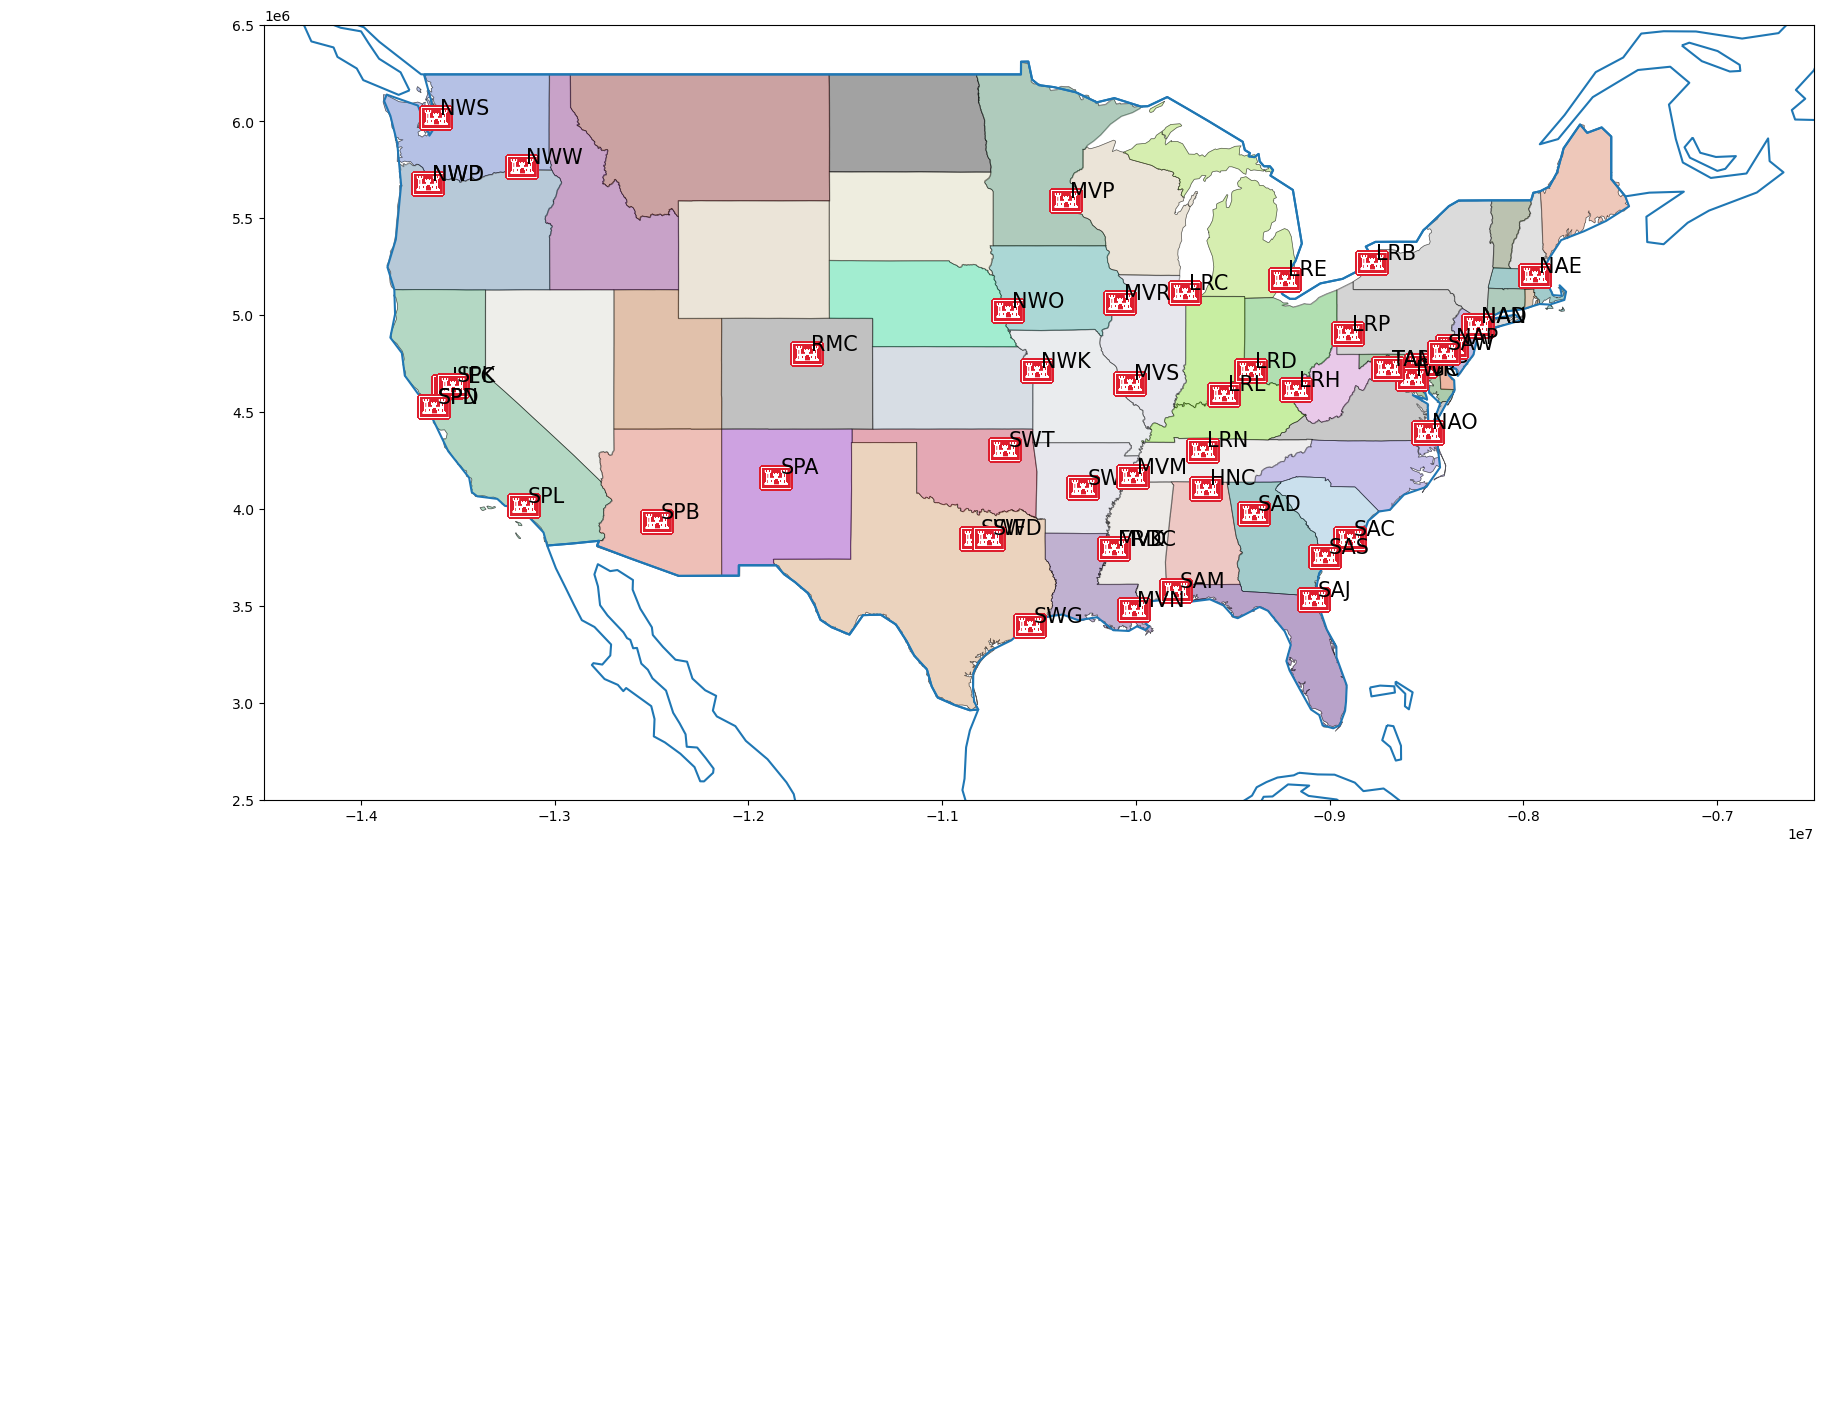

In [33]:
import copy
locations_to_plot = offices_mercator.Identifier.values
ax2 = offices.plot(figsize=(20,20), marker='o', color='red', markersize=20, alpha=0.5)
world_mercator.boundary.plot(ax=ax2)
states_mercator.plot(ax=ax2, alpha=0.5, color='lightgray', linewidth=0.5, edgecolor='black')
offices_mercator.plot(ax=ax2, marker='o', color='red', markersize=20)

for state_name in states_mercator.STATE_NAME.values:
    color = numpy.random.choice(colors)
    state = states_mercator.loc[states['STATE_NAME'] == state_name]
    state.plot(ax=ax2, alpha=0.3, color=color, linewidth=0.5, edgecolor='black')

for x, y, label in zip(offices_mercator.geometry.x, offices_mercator.geometry.y, offices_mercator.Identifier):
    im = OffsetImage(plt.imread('/Users/todd/GitHub/ecohydrology/Distribution/Info/Corps_Castle.png', format="png"), zoom=.06)
    ax2.add_artist(AnnotationBbox(im, (x, y), frameon=False))
    if label in locations_to_plot:
        ax2.annotate(label, xy=(x+0.25, y+0.2), xytext=(3, 3), size=15, textcoords="offset points")

ax2.set_xlim([-1.45e7,-0.65e7])
ax2.set_ylim([2.5e6,0.65e7])
# ax2.set_ylim([0.2,0.65e7])

In [9]:
# world.plot(column='pop_est', ax=ax, legend=True)
offices.to_excel('USACE_Offices_and_locations_output.xlsx')

In [10]:
offices_mercator.to_excel('USACE_Offices_and_locations_Mercator.xlsx')